<a href="https://colab.research.google.com/github/xiaorui777/NLP/blob/master/Build_Search_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build Search Engine

#### Input：Words
#### Output： Documents

In [0]:
csv_path = './sqlResult_1558435.csv'

In [0]:
import pandas as pd
csv = pd.read_csv(csv_path, encoding = 'gb18030')

In [0]:
content = csv.fillna(' ')
news_content = content['content'].tolist()

In [0]:
# 中文分词
import jieba
def cut(string): return ' '.join(jieba.cut(string))

In [0]:
# 切词
import re
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [0]:
news_content = [token(n) for n in news_content]

In [10]:
news_content = [' '.join(n) for n in news_content]
news_content = [cut(n) for n in news_content]

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.062 seconds.
Prefix dict has been built succesfully.


In [11]:
news_content[2]

'此前 的 一加 3T 搭载 的 是 3400mAh 电池   DashCharge 快充 规格 为 5V   4A   至于 电池 缩水   可能 与 刘作 虎 所说   一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关   按照 目前 掌握 的 资料   一加 手机 5 拥有 5   5 寸 1080P 三星 AMOLED 显示屏   6G   8GB   RAM   64GB   128GB   ROM   双 1600 万 摄像头   备货 量   惊喜   根据 京东 泄露 的 信息   一加 5 起 售价 是 xx99 元   应该 是 在 2799   2899   2999 中 的 某个'

## TFIDF Vectorized

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorized = TfidfVectorizer()

In [0]:
sample_num = 10000
sub_samples = news_content[:sample_num]

In [0]:
X = vectorized.fit_transform(sub_samples)

In [16]:
X.shape

(10000, 135035)

# Build Search Engine（Boolean search）
#### input: words
#### output: documents

In [0]:
def naive_search(keywords):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
# 缺点：非常耗时

In [0]:
# TFIDF的横轴是word1，word2...，纵轴是Document1，Document2...
# Boolean Search的横轴是Document1，Document2...，纵轴是word1，word2...
# 所以如果用Boolean Search优化搜索引擎的话，只需要将TFIDF转置即可

transposed_x = X.transpose().toarray()

In [19]:
word_2_id = vectorized.vocabulary_
word_2_id['此外']

83934

In [0]:
# 将 ID 当作 keys，word 当作 values
id_2_word = {d: w for w,d in word_2_id.items()}

In [21]:
id_2_word[83934]

'此外'

In [22]:
word_2_id['国际']

45792

In [23]:
word_2_id['金融']

125469

In [0]:
import numpy as np

# 在以下这些文章编号中出现了'国际'
international = set(np.where(transposed_x[45792])[0])

# 在以下这些文章编号中出现了'金融'
financial = set(np.where(transposed_x[125469])[0])

In [25]:
# 两者做一个交集，即以下的文章既出现了'国际'，又出现了'金融'
international & financial

{7,
 8,
 9,
 14,
 90,
 191,
 528,
 600,
 735,
 764,
 769,
 779,
 812,
 835,
 876,
 914,
 918,
 950,
 1028,
 1082,
 1102,
 1106,
 1125,
 1146,
 1151,
 1160,
 1201,
 1258,
 1288,
 1324,
 1395,
 1445,
 1466,
 1596,
 1599,
 1600,
 1624,
 1656,
 1745,
 1948,
 1960,
 2067,
 2099,
 2220,
 2237,
 2254,
 2314,
 2319,
 2333,
 2345,
 2356,
 2360,
 2507,
 2513,
 2542,
 2560,
 2669,
 2685,
 2696,
 2776,
 2829,
 2856,
 2861,
 2867,
 2928,
 2931,
 2960,
 3002,
 3051,
 3214,
 3461,
 3478,
 3517,
 3519,
 3573,
 3702,
 3715,
 3721,
 3740,
 3762,
 3786,
 3830,
 3837,
 3892,
 3916,
 3947,
 3953,
 3955,
 4024,
 4025,
 4083,
 4087,
 4127,
 4212,
 4235,
 4288,
 4289,
 4313,
 4318,
 4331,
 4338,
 4357,
 4361,
 4370,
 4372,
 4390,
 4407,
 4412,
 4430,
 4440,
 4457,
 4486,
 4491,
 4507,
 4582,
 4601,
 4738,
 4762,
 4831,
 4969,
 4990,
 4995,
 4999,
 5030,
 5072,
 5076,
 5085,
 5171,
 5227,
 5308,
 5380,
 5388,
 5416,
 5508,
 5514,
 5518,
 5520,
 5528,
 5537,
 5564,
 5587,
 5603,
 5606,
 5678,
 5755,
 5811,
 582

In [0]:
from functools import reduce

In [0]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [0]:
from operator import and_

In [29]:
# 求 d1, d2, d3 的交集
reduce(and_, [d1, d2, d3])

{3}

In [0]:
# 定义搜索引擎

def search_engine(query):
    '''
    @query is the searched words, splited by space
    @ return is the related documents which ranked by tfidf similarity
    '''
    words = query.split()
        
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    
    candidates_ids = [word_2_id[w] for w in words]
    documents_ids = [
        set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    merged_documents = reduce(and_,documents_ids)
    return merged_documents
    # 我们就能知道哪些文章包含了这些单词
    
    # 加一个文章排序
    # sorted_documents_id = sorted(merged_documents, key = lambda i: distance(query_vec, X[i].toarray()))
    # return sorted_documents_id 

In [31]:
# 而且比 naive search 快很多

search_engine('国际 金融 股价 下跌')

{1146, 4582, 4831, 5606, 6781}

In [0]:
# 正则表达式 re.complie: python会将字符串转换为正则表达式对象
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [40]:
# 把字符串替换成打印出的形式
get_query_pat('国际 金融 股价 下跌')

re.compile(r'(国际|金融|股价|下跌)', re.UNICODE)

In [0]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document)

In [43]:
# 将带有 '国际 金融 股价 下跌' 的关键字替换为 **关键字** 形式
highlight_keywords(get_query_pat('国际 金融 股价 下跌'), content['content'][1146])

'\u3000\u3000新华社伦敦６月２１日电（记者邓茜）伦敦股市《**金融**时报》１００种股票平均价格指数２１日报收７４４７．７９点，比前一交易日**下跌**２４．９２点，跌幅为０．３３％。欧洲三大股指当天均以**下跌**报收。\r\n\u3000\u3000个股方面，当天伦敦股市成分股中矿业股领涨，位于涨幅前五位的个股分别为：餐饮及酒店集团惠特布雷德**股价**上涨３．４０％，英国天然气供应商森特理克集团**股价**上涨２．１３％，希尔制药**股价**上涨２．０５％，**国际**联合航空集团**股价**上涨１．９５％，嘉能可**股价**上涨１．７５％。\r\n\u3000\u3000当天伦敦股市成分股中**金融**股领跌，位于跌幅前五位的个股分别为：Ｐｒｏｖｉｄｅｎｔ投资公司**股价****下跌**１７．５９％，**金融**服务商哈格里夫斯－兰斯当**股价****下跌**２．４２％，**金融**投资公司Ｓｔ\u3000Ｊａｍｅｓ＇ｓ\u3000Ｐｌａｃｅ**股价****下跌**１．７９％，保险公司标准人寿**股价****下跌**１．５６％，家用清洁用品公司利洁时公司**股价****下跌**１．４８％。\r\n\u3000\u3000欧洲其他两大主要股指方面，法国巴黎股市ＣＡＣ４０指数报收５２７４．２６点，比前一交易日**下跌**１９．３９点，跌幅为０．３７％；德国法兰克福股市ＤＡＸ指数报收１２７７４．２６点，比前一交易日**下跌**４０．５３点，跌幅为０．３２％。\r\n'

In [0]:
def search_engine_with_pretty_print(query):   
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        print('# Search Result {}'.format(i))
        c = (content['content'][_id])
        c = highlight_keywords(get_query_pat(query), c)
        print(c)

In [47]:
search_engine_with_pretty_print('国际 金融 股价 下跌')

# Search Result 0
“大象股”分化 短期需控仓位
　　在银行、保险等**金融**股的带领下，A股昨日早盘走高，上证指数冲击3200点。但盘中受到万达电影、复星医药等行业龙头股的相关传闻影响而突然“闪崩”，带动中小盘快速**下跌**，并拖累大盘指数尾盘跳水，沪指最终**下跌**0.28%，创业板再度失守1800点。
　　文、表?广州日报全媒体记者张忠安（除署名外）
　　受到周三沪深两市冲高影响，周四早盘A股一片红，上证指数最高至3186点，创业板指数也冲击到1830点附近。盘面上，家电、白酒、银行、保险、汽车等大盘权重股纷纷走高，美的集团最高上涨到43.44元，再创历史新高。贵州茅台也达到477.93元的历史峰值。另外，中国平安、海康威视、苏泊尔等纷纷在周四创出上市以来的最高位。不过，数据显示，此前强势的大盘蓝筹股出现分化，其中，保险、银行等维持强势，而白酒、家电等却放量回撤，五粮液等尾盘跳水。
　　对此，申万宏源分析师钱启敏表示，根据目前行情，一方面是大盘蓝筹股今年已经跑赢大盘，预期利好有所消化。另一方面短线市场缺乏资金支持，5月初至今存量资金净流失1700亿元，日均余额已连续8周低于1.3万亿元，成为制约行情的最重要因素。因此，他指出，A股目前短线心态严重，轮动迅速，以脉冲性走势为主，把握难度较大。
　　多股异动??机构抛售万达电影2.29亿元
　　值得注意的是，在周四A股盘面上，部分上市公司因为市场传闻而出现异动，其中，万达旗下的万达电影遭遇至少四家机构抛售，**股价**跌停，下午紧急停牌。而复星医药盘中也遭遇快速跳水，A股收盘跌幅超过8%，H股跌幅接近6%。
　　昨日，万达系**金融**产品市场表现也赚足了眼球，出现“股债”双杀，其中万达电影午后临停，截至停牌跌9.91%。同时，万达多只债券纷纷**下跌**。
　　有机构人士表示，万达系昨日异动主要是受到市场传闻影响。万达集团发布声明称：“网上有人恶意炒作建行等银行下发通知抛售万达债券一事，经了解建行等行从未下发此类通知，网上炒作属于谣言。”
　　记者从交易所获取的数据显示，虽然只有半天的交易，但成交量却创下今年3月1日以来的最高水平，达到12.4亿元。在**股价**大跌背后是机构的抛售，其中，4大机构专用席位合计卖出2.29亿元，1机构席位买入2609.27万元。申万宏源上海一营业部买入697

In [55]:
search_engine_with_pretty_print('文化 方案 学校 国际')

# Search Result 0
城市创新发展需要智力支撑。如果一个城市，没有智力资源集聚的高校，其如何能够创新发展？相比广深等城市，惠州理工科是短板，在仅有一所本科院校的情况下，惠州如何弥补高校短板，引入更多创新资源，支撑城市创新发展？
产学九问
“如果说一个地方没有高技术产生来源，创新城市靠什么来引领？”日前，中国科学院院士、清华大学副校长薛其坤在接受南方报业科交会全媒体报道组采访时直言，城市没有高技术产生来源，其创新发展必将成为一项难题。而这也是现阶段的惠州所直面的难题：薄弱的高等教育与城市创新发展需求之间存在着矛盾。
解读大学与城市之间的关系，斯坦福大学与硅谷一直被视作标杆。
在高科技产业云集的硅谷，斯坦福大学不仅为硅谷输送了大批的顶尖人才，为硅谷的形成和蓬勃发展作出了巨大的贡献，并且帮助硅谷把创业的**文化**传承至今。
如今，惠州潼湖生态智慧区剑指“广东硅谷”。反观惠州的高校，理工科是短板，至今没有一所理工科大学。仅有的一所本科院校——惠州学院在推动科研创新、培育本土人才方面，具有举足轻重的地位。
没有可产生足够多源头创新的高校，惠州如何创新发展？薛其坤认为破解的关键在于立足自己、立足周围、立足合作。
优化高校学科设置、携手企业搭建产学研创新平台、改革科研成果转化和人才激励机制、吸引更多**国际**研发机构落户……惠州高校正努力立足自己、立足周围、立足合作，成为惠州现代经济发展创新的“大脑”。这也是惠州高校为创新做支撑的必由之路。
南方日报记者 黄珊
以人为本
培养应用型人才支撑企业转型升级
高校是政府和企业开发、运用新技术的重要来源。也正因为如此，在美国硅谷、北京中关村、武汉光谷等地，高新技术园区因大学而兴，大学因高新技术园区而盛的例子比比皆是。
目前，惠州多所高校均进行了各种创新尝试：惠州学院已与政府、企业、高校及有关社会组织合作，建立30多个产学研合作平台，为学院教师提供便利的科研条件，也给学生参与实习提供了机会；惠州城市职业学院设立科创中心，增强优势学科实力的同时也孵化具体产业项目；惠州工程技术**学校**重点培育城际轨道交通运营、高端制造业等多个协同创新中心，分别对接本地轨道交通、新能源汽车等产业。
人才培养也是高校创新能力的重要组成。与北京、广州等地的部分研究型大学相比，惠州高校在理工科类的基础研究上有所不足。但是在创新型技能人才的培养上，

# PageRank

In [0]:
import networkx as nx
import random
from string import ascii_uppercase

In [60]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [0]:
# 随机生成一些网页
def generate_random_website():
    return 'www' + '.' + ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 10))]) + '.' + random.choice(['com', 'cn', 'net']) 

In [70]:
generate_random_website()

'www.AWJYKW.cn'

In [0]:
websites = [generate_random_website() for _ in range(25)]

In [73]:
websites

['www.LSRLIF.net',
 'www.OLIQVK.net',
 'www.SGQP.com',
 'www.OHYY.cn',
 'www.HHKDEMN.cn',
 'www.YZCLXLHQ.net',
 'www.ZUAVMFG.com',
 'www.IYRMG.net',
 'www.CCICJTPV.com',
 'www.CWZXTHJEAS.cn',
 'www.WCTBNVSDTR.net',
 'www.QWLUUYR.net',
 'www.ZMJZG.cn',
 'www.PDGFQIVFG.com',
 'www.WENAGN.com',
 'www.TLCWND.cn',
 'www.HGKEPTTIDP.com',
 'www.QZG.net',
 'www.VHQCW.cn',
 'www.HVJ.com',
 'www.ONMLNDZ.cn',
 'www.CXMKVO.net',
 'www.JPJDDPEBHX.cn',
 'www.PVRCEBCEEL.net',
 'www.XZISURFB.net']

In [74]:
random.sample(websites, 10)

['www.TLCWND.cn',
 'www.VHQCW.cn',
 'www.YZCLXLHQ.net',
 'www.PDGFQIVFG.com',
 'www.ZMJZG.cn',
 'www.HVJ.com',
 'www.HHKDEMN.cn',
 'www.QZG.net',
 'www.CCICJTPV.com',
 'www.LSRLIF.net']

In [0]:
#  让网页之间有链接关系
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[2]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1)
}

In [0]:
website_network = nx.graph.Graph(website_connection)

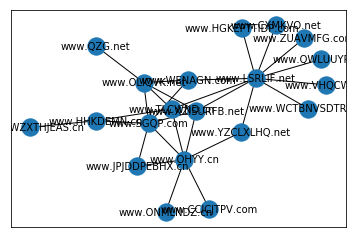

In [78]:
nx.draw_networkx(website_network, font_size = 10)

In [80]:
# 将网站按重要程度排序
# 最重要的是 www.LSRLIF.net
# 最不重要的是 www.QZG.net
sorted(nx.pagerank(website_network).items(), key = lambda x: x[1], reverse = True)

[('www.LSRLIF.net', 0.1915438249684276),
 ('www.OHYY.cn', 0.11262057105226515),
 ('www.OLIQVK.net', 0.09059926156723887),
 ('www.SGQP.com', 0.09009247079506744),
 ('www.TLCWND.cn', 0.06381334462725616),
 ('www.XZISURFB.net', 0.06157382878909347),
 ('www.HHKDEMN.cn', 0.05295118103444847),
 ('www.WENAGN.com', 0.047898728162076236),
 ('www.YZCLXLHQ.net', 0.03597593774863178),
 ('www.JPJDDPEBHX.cn', 0.03393822039314864),
 ('www.CWZXTHJEAS.cn', 0.022502635604294104),
 ('www.WCTBNVSDTR.net', 0.02230083712161455),
 ('www.QWLUUYR.net', 0.02230083712161455),
 ('www.ZUAVMFG.com', 0.02230083712161455),
 ('www.VHQCW.cn', 0.02230083712161455),
 ('www.HGKEPTTIDP.com', 0.02230083712161455),
 ('www.CXMKVO.net', 0.02230083712161455),
 ('www.CCICJTPV.com', 0.021175100627017232),
 ('www.ONMLNDZ.cn', 0.021175100627017232),
 ('www.QZG.net', 0.020334771274330282)]